In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics.pairwise import cosine_similarity

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data = np.load('/content/gdrive/My Drive/data/stereo_matching/cosine_2.npy')
print(data.shape)

(1000000, 2, 15, 15, 1)


In [3]:
data = data.transpose((0, 4, 2, 3, 1))
print(data.shape)

(1000000, 1, 15, 15, 2)


In [4]:
data = data.reshape(data.shape[0], 15, 15, 2)
print(data.shape)

(1000000, 15, 15, 2)


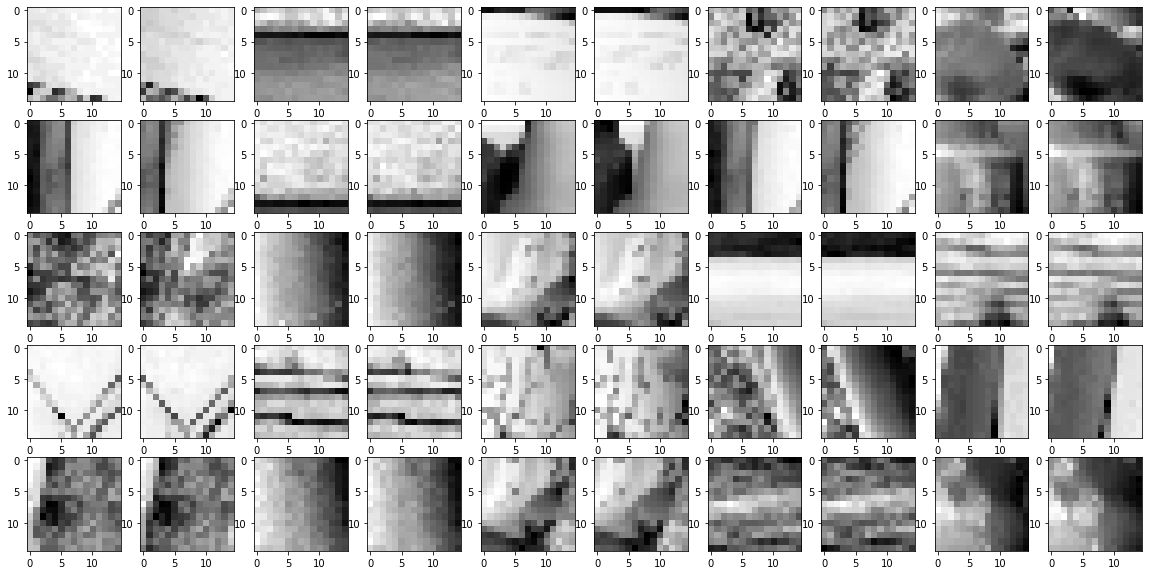

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
count = 1
for i in range(25):
    for j in range(2):
        plt.subplot(5, 10, count) # (nrows, ncols, index)
        plt.imshow(data[i,:,:,j].reshape(15,15), 'gray')
        count += 1
plt.show()

49.999992


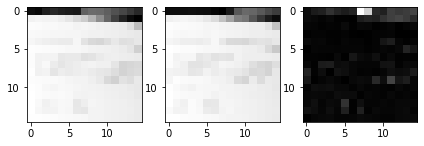

In [18]:
plt.figure(figsize=(7,7))

left_img  = data[2,:,:,0]
right_img = data[2,:,:,1]

plt.subplot(1, 3, 1) # (nrows, ncols, index)
plt.imshow(left_img, 'gray')

plt.subplot(1, 3, 2) # (nrows, ncols, index)
plt.imshow(right_img, 'gray')

difference = np.absolute(left_img-right_img)
min_value  = np.max(difference)
print(min_value)
difference = difference*5.0

plt.subplot(1, 3, 3) # (nrows, ncols, index)
plt.imshow(difference, 'gray')